In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
single = pd.read_csv('./result-single.csv')

In [3]:
single

,alpha,rrt sampling,field width,field height,num mobiles,num statics,trial,uptime,elapsed time
0,0.0,500,200,200,20,0,#0,737853,0.021204
1,0.0,500,200,200,20,0,#1,731409,0.023465
2,0.0,500,200,200,20,0,#2,730122,0.019668
3,0.0,500,200,200,20,0,#3,725533,0.021729
4,0.0,500,200,200,20,0,#4,734205,0.026386
...,...,...,...,...,...,...,...,...,...
3595,0.0,500,800,600,40,40,#95,687437,0.845498
3596,0.0,500,800,600,40,40,#96,683801,1.424220
3597,0.0,500,800,600,40,40,#97,675587,0.918668
3598,0.0,500,800,600,40,40,#98,688478,1.608347


In [4]:
single_mean = single.drop(['alpha', 'trial'], axis=1).groupby(
  ['field width', 'field height', 'num mobiles', 'num statics'], as_index=False).mean()
single_mean

,field width,field height,num mobiles,num statics,rrt sampling,uptime,elapsed time
0,200,200,20,0,500.0,734687.52,0.020730
1,200,200,20,20,500.0,735698.71,0.020561
2,200,200,20,40,500.0,734101.73,0.021296
3,200,200,30,0,500.0,740175.10,0.034510
4,200,200,30,20,500.0,739624.59,0.034865
5,200,200,30,40,500.0,739513.02,0.034736
6,200,200,40,0,500.0,742140.16,0.041767
7,200,200,40,20,500.0,742573.34,0.044859
8,200,200,40,40,500.0,742261.44,0.045696
9,400,400,20,0,500.0,693321.71,0.062186


In [5]:
single_mean = single_mean.groupby(['field width', 'field height'])

In [6]:
single_mean600 = single_mean.get_group((600, 600))
single_mean600

,field width,field height,num mobiles,num statics,rrt sampling,uptime,elapsed time
18,600,600,20,0,500.0,629392.04,0.156867
19,600,600,20,20,500.0,631140.43,0.148717
20,600,600,20,40,500.0,628513.86,0.153650
21,600,600,30,0,500.0,678169.64,0.329572
22,600,600,30,20,500.0,677832.55,0.330091
23,600,600,30,40,500.0,679157.54,0.318196
24,600,600,40,0,500.0,692923.00,0.676075
25,600,600,40,20,500.0,692898.02,0.652791
26,600,600,40,40,500.0,693270.74,0.659534


In [7]:
num_sensors = single_mean600['num statics'] + single_mean600['num mobiles']
ratio_mobiles = single_mean600['num mobiles'] / num_sensors
single_mean600['num sensors'] = num_sensors
single_mean600['ratio of mobiles'] = ratio_mobiles

/home/daichi/.anyenv/envs/pyenv/versions/miniconda3-4.7.12/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/daichi/.anyenv/envs/pyenv/versions/miniconda3-4.7.12/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [8]:
single_mean600

,field width,field height,num mobiles,num statics,rrt sampling,uptime,elapsed time,num sensors,ratio of mobiles
18,600,600,20,0,500.0,629392.04,0.156867,20,1.000000
19,600,600,20,20,500.0,631140.43,0.148717,40,0.500000
20,600,600,20,40,500.0,628513.86,0.153650,60,0.333333
21,600,600,30,0,500.0,678169.64,0.329572,30,1.000000
22,600,600,30,20,500.0,677832.55,0.330091,50,0.600000
23,600,600,30,40,500.0,679157.54,0.318196,70,0.428571
24,600,600,40,0,500.0,692923.00,0.676075,40,1.000000
25,600,600,40,20,500.0,692898.02,0.652791,60,0.666667
26,600,600,40,40,500.0,693270.74,0.659534,80,0.500000


In [12]:
uptimes = single_mean600['uptime'].values.reshape((3, 3)) / 3600
uptimes

array([[174.83112222, 175.31678611, 174.58718333],
       [188.38045556, 188.28681944, 188.65487222],
       [192.47861111, 192.47167222, 192.57520556]])

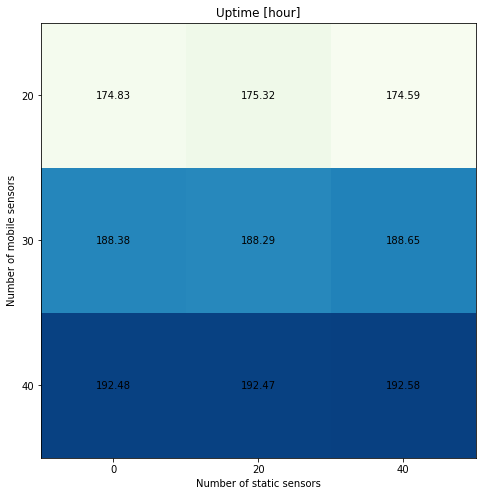

In [17]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.imshow(uptimes, cmap='GnBu')
ax.set_xticks(np.arange(uptimes.shape[1]))
ax.set_xticklabels(['0', '20', '40'])
ax.set_yticks(np.arange(uptimes.shape[0]))
ax.set_yticklabels(['20', '30', '40'])
ax.set_xlabel('Number of static sensors')
ax.set_ylabel('Number of mobile sensors')
ax.set_title('Uptime [hour]')

for i in range(uptimes.shape[0]):
  for j in range(uptimes.shape[1]):
    ax.text(j, i, '{:.2f}'.format(uptimes[i][j]), ha='center', va='center', color='black')
plt.show()

In [22]:
def plot_uptimes(file):
  data = pd.read_csv(file)
  data = data.drop(['trial'], axis=1).groupby(
    ['field width', 'field height', 'num mobiles', 'num statics'], as_index=False).mean()
  data = data.groupby(['field width', 'field height'], as_index=False).get_group((600, 600))
  uptimes = data['uptime'].values.reshape((3, 3)) / 3600
  num_mobiles= data['num mobiles'].values
  num_statics = data['num statics'].values

  fig = plt.figure(figsize=(8, 8))
  ax = fig.add_subplot(111)
  ax.imshow(uptimes, cmap='GnBu')
  ax.set_xticks(np.arange(uptimes.shape[1]))
  ax.set_xticklabels(['0', '20', '40'])
  ax.set_yticks(np.arange(uptimes.shape[0]))
  ax.set_yticklabels(['20', '30', '40'])
  ax.set_xlabel('Number of static sensors')
  ax.set_ylabel('Number of mobile sensors')
  ax.set_title('Uptime [hour]')
  
  for i in range(uptimes.shape[0]):
    for j in range(uptimes.shape[1]):
      ax.text(j, i, '{:.2f}'.format(uptimes[i][j]), ha='center', va='center', color='black')
  plt.show()

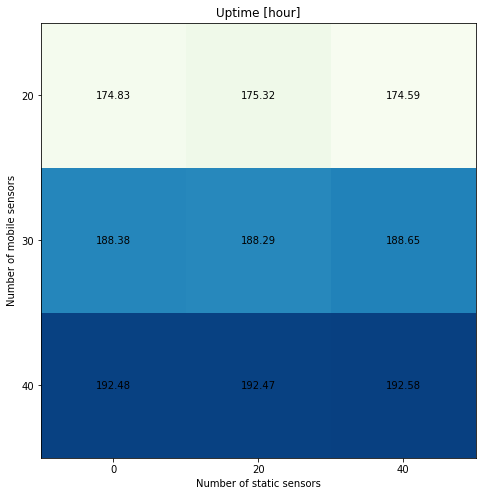

In [23]:
plot_uptimes('./result-single.csv')

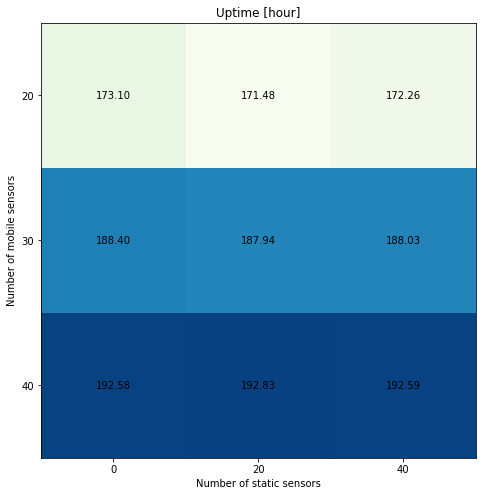

In [25]:
plot_uptimes('./result-multi.csv')